# CLASE 29.07

## Metodos para encontrar raices.

El **método de bisección** parte de un intervalo $[a,b]$ donde $f(a)f(b)<0$ y usa la fórmula:

$$
x = \frac{a+b}{2}
$$

Luego se evalúa:

$$
\text{Si } f(a)f(x) < 0 \Rightarrow b = x
$$

$$
\text{Caso contrario } a = x
$$

Esto se repite hasta que $|b-a| < \text{tolerancia}$ o $f(x)=0$.

**Resumido:**

1. Calcular el punto medio: $x = (a+b)/2$.
2. Si $f(a)f(x) < 0$, la raíz está en $[a,x]$ ⇒ $b = x$.
3. Si no, la raíz está en $[x,b]$ ⇒ $a = x$.



### Secante

El método de la **secante** para encontrar raíces de una función $f(x) = 0$ utiliza la fórmula:

$$
x_{k+1} = x_k - f(x_k)\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
$$

O también se puede escribir como:

$$
x_{k+1} = \frac{x_{k-1} f(x_k) - x_k f(x_{k-1})}{f(x_k) - f(x_{k-1})}
$$

- Necesitas dos aproximaciones iniciales $x_{k-1}$ y $x_k$. sino 
- A partir de ellas calculas $x_{k+1}$ y sigues iterando hasta cumplir la tolerancia.



El método de **Newton-Raphson** para encontrar raíces de una función $f(x) = 0$ usa la fórmula:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

---

### ¿Dónde puede dar error?

1. **Si $f'(x_k) = 0$**

   * La fórmula implica una división entre $f'(x_k)$. Si la derivada es cero, el método falla (división por cero).
2. **Si $f'(x_k)$ es muy pequeño**

   * Puede provocar grandes saltos en la aproximación y la iteración puede divergir.
3. **Si la raíz es múltiple**

   * La convergencia es más lenta y puede incluso fallar.
4. **Si la aproximación inicial $x_0$ está lejos de la raíz**

   * El método puede divergir o ir hacia otra raíz.

---


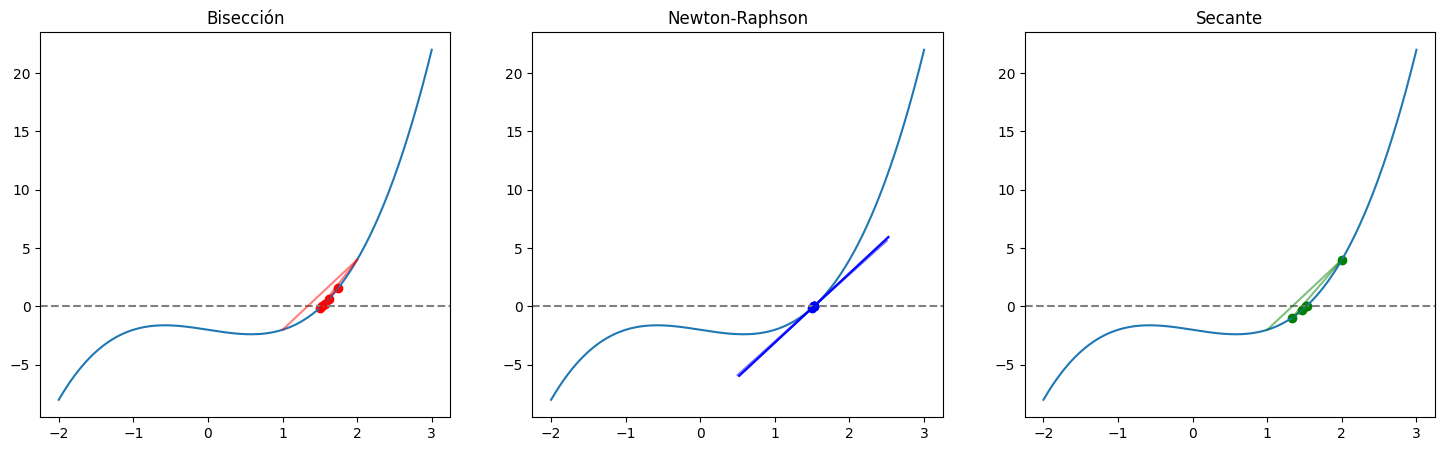

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def metodos_numericos_rectas():
    # Función y su derivada
    def f(x):
        return x**3 - x - 2

    def df(x):
        return 3*x**2 - 1

    # Rango para graficar la función
    x_vals = np.linspace(-2, 3, 400)
    y_vals = f(x_vals)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    titulos = ["Bisección", "Newton-Raphson", "Secante"]

    # ================== MÉTODO DE BISECCIÓN ==================
    a, b = 1, 2
    axs[0].plot(x_vals, y_vals, label="f(x)")
    axs[0].axhline(0, color="gray", linestyle="--")

    for _ in range(5):
        x = (a + b) / 2
        # Recta del intervalo
        axs[0].plot([a, b], [f(a), f(b)], "r-", alpha=0.5)
        axs[0].scatter([x], [f(x)], color="red")
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x

    axs[0].set_title(titulos[0])

    # ================== MÉTODO NEWTON-RAPHSON ==================
    x = 1.5
    axs[1].plot(x_vals, y_vals, label="f(x)")
    axs[1].axhline(0, color="gray", linestyle="--")

    for _ in range(5):
        if df(x) == 0:
            break
        # Puntos y tangente
        y = f(x)
        axs[1].scatter([x], [y], color="blue")
        # Tangente: y = f(x) + f'(x)(X - x)
        X_line = np.linspace(x-1, x+1, 20)
        axs[1].plot(X_line, y + df(x) * (X_line - x), "b-", alpha=0.5)
        x = x - f(x)/df(x)

    axs[1].set_title(titulos[1])

    # ================== MÉTODO DE LA SECANTE ==================
    x0, x1 = 1, 2
    axs[2].plot(x_vals, y_vals, label="f(x)")
    axs[2].axhline(0, color="gray", linestyle="--")

    for _ in range(5):
        axs[2].scatter([x1], [f(x1)], color="green")
        # Dibujar recta secante
        axs[2].plot([x0, x1], [f(x0), f(x1)], "g-", alpha=0.5)
        if f(x1) - f(x0) == 0:
            break
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x2

    axs[2].set_title(titulos[2])

    plt.show()

# Llamar función
metodos_numericos_rectas()




### **Comparación de métodos**

| Método             | Ventajas                                                 | Desventajas        |
| ------------------ | -------------------------------------------------------- | ------------------ |
| **Bisección**      | *(pendiente)*                                            | Convergencia lenta |
| **Newton-Raphson** | Convergencia rápida (cuando $x_0$ está cerca de la raíz) | LLegan a fallar      |
| **Secante**        | Convergencia rápida y no requiere derivada               | LLegan a fallar      |

---


## Desarrollo del cálculo del número de iteraciones en Bisección

1. **Contexto:**
   El método de bisección parte de un intervalo $[a, b]$ donde sabemos que $f(a) \cdot f(b) < 0$, es decir, la raíz está dentro del intervalo. En cada iteración el intervalo se reduce a la mitad.

2. **Longitud del intervalo después de $n$ iteraciones:**
   Al dividir a la mitad el intervalo en cada paso, la longitud del intervalo después de $n$ pasos es:

   $$
   L_n = \frac{b - a}{2^n}
   $$

3. **Precisión deseada:**
   Queremos que la longitud del intervalo sea menor o igual a la precisión deseada $\varepsilon$:

   $$
   L_n \leq \varepsilon
   $$

   Entonces:

   $$
   \frac{b - a}{2^n} \leq \varepsilon
   $$

4. **Despejamos $n$:**

   Multiplicamos ambos lados por $2^n$:

   $$
   b - a \leq \varepsilon \cdot 2^n
   $$

   Dividimos entre $\varepsilon$:

   $$
   \frac{b - a}{\varepsilon} \leq 2^n
   $$

   Tomamos logaritmo base 2 en ambos lados (recordando que $\log_2(2^n) = n$):

   $$
   \log_2 \left( \frac{b - a}{\varepsilon} \right) \leq n
   $$

5. **Interpretación:**
   El número mínimo de iteraciones necesarias para asegurar una precisión $\varepsilon$ es:

   $$
   n \geq \log_2 \left( \frac{b - a}{\varepsilon} \right)
   $$

---

## Resumen:

$$
\boxed{
n = \left\lceil \log_2 \left( \frac{b - a}{\varepsilon} \right) \right\rceil
}
$$

(donde $\lceil \cdot \rceil$ indica que redondeamos hacia arriba porque el número de iteraciones es entero).

---


Claro, aquí te explico por qué y cómo pueden fallar los métodos de **Newton-Raphson** y **Secante** por divergencia o ciclos:

---

## 1. **Newton-Raphson**: causas de fallo

* **Derivada cercana o igual a cero**
  Cuando $f'(x_k)$ es cero o muy pequeño, el paso

  $$
  x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
  $$

  puede dar saltos muy grandes, alejándose de la raíz.

* **Elección mala de $x_0$ (punto inicial)**
  Si el punto inicial está lejos de la raíz real, la iteración puede desviarse o incluso ir hacia otra raíz o infinito.

* **Raíz múltiple o plana**
  Cuando la raíz no es simple, la convergencia se vuelve lenta o errática, incluso puede no converger.

* **Funciones con comportamiento complicado**
  Funciones con múltiples raíces, oscilaciones o singularidades pueden causar que la iteración oscile sin converger (ciclos).

---

## 2. **Método de la Secante**: causas de fallo

* **Diferencia en el denominador cero o cercana a cero**
  En

  $$
  x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
  $$

  si $f(x_k) \approx f(x_{k-1})$, la división se hace muy grande o indefinida, causando inestabilidad.

* **Malos puntos iniciales $x_0, x_1$**
  Pueden provocar que la secuencia diverja o entre en ciclos.

* **Funciones no bien comportadas**
  Igual que Newton, funciones con raíces múltiples, oscilaciones o discontinuidades pueden causar ciclos o divergencia.

---

## **¿Qué es un ciclo?**

Un ciclo ocurre cuando la iteración vuelve a un punto anterior y repite un conjunto finito de valores (por ejemplo: $x_3 = x_1$, $x_4 = x_2$, etc.), sin acercarse a la raíz. Es un tipo de **no convergencia**.

---

## Resumen rápido

| Método         | Causas de divergencia o ciclos                                              |
| -------------- | --------------------------------------------------------------------------- |
| Newton-Raphson | Derivada cero o muy pequeña, mal punto inicial, raíz múltiple, oscilaciones |
| Secante        | División por cero (o casi), malos puntos iniciales, función irregular       |

---


### Representacion Vectorial


$$
X = \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2, \quad
F(X) = \begin{pmatrix} f_1(x,y) \\ f_2(x,y) \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$


Vamos a resolver y encontar los ceros , para ello encontramos el jacobiano


$$
J_F(X) =
\begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{pmatrix}
$$



El metodo de nwton para funciones de ese tipo sera el siguiente tenemos que el original funcion le aplicamos la funcion del jabociano


$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

Esto es newton la original . Pero la division por matrices no existe. Asi que vamos a hacer es hacer la multiplicacion de la inversa de  la matriz derivada.

$$
X_{k+1} = X_k - J_F(X_k)^{-1} F(X_k)
$$

Esto ultimo es la ecuacion del **metodo de newton en varias variables**


Y la condicion de paro es 
$$
|x_{k+1} - x_k| < tol
$$

#### Ejemplo 

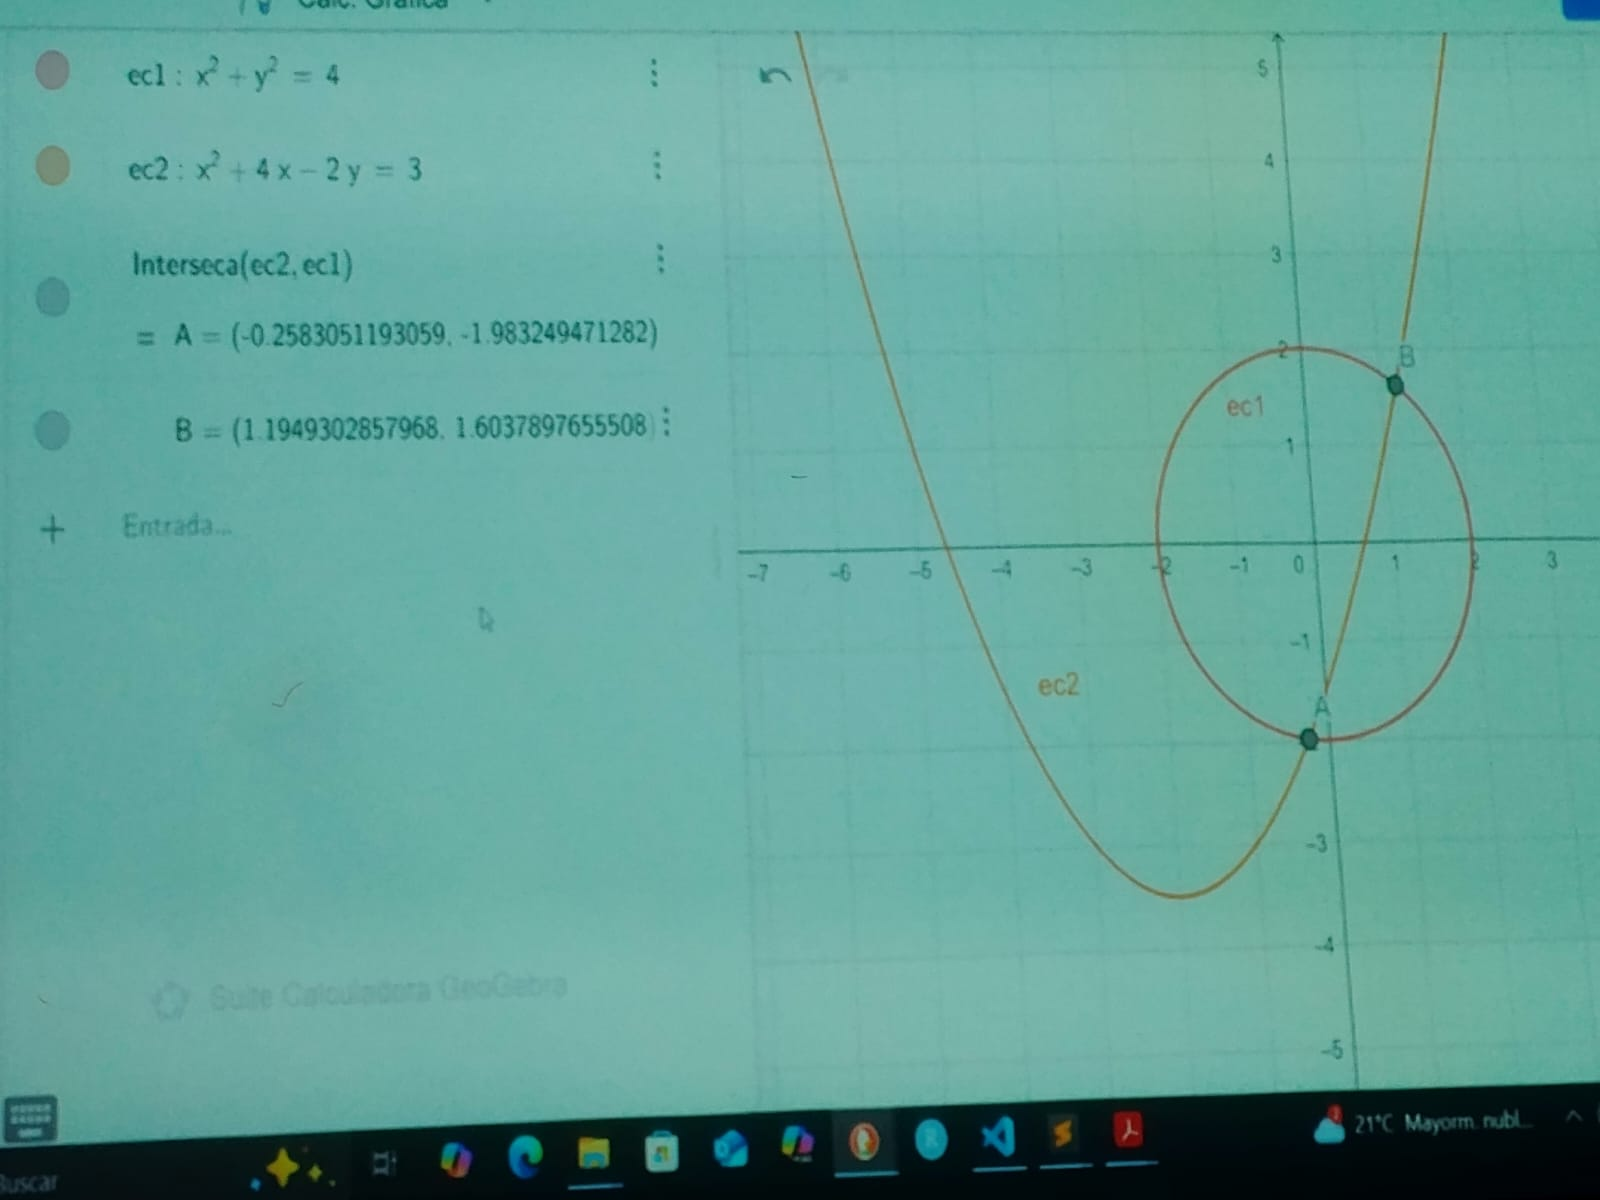

Este usando el codigo de newton extendido para R*n se puede usar para encontrar los interceptos. 